In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [2]:
covid_data = pd.read_csv('covid_19_india.csv')

In [3]:
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid_data.shape

(1025, 9)

In [5]:
covid_data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
covid_data.Time.unique()

array(['6:00 PM', '10:00 AM', '7:30 PM', '9:30 PM', '8:30 PM', '5:00 PM'],
      dtype=object)

In [7]:
covid_data["State/UnionTerritory"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Nagaland#'], dtype=object)

In [8]:
covid_data.describe()

,Sno,Cured,Deaths,Confirmed
count,1025.000000,1025.000000,1025.000000,1025.000000
mean,513.000000,10.032195,3.199024,107.979512
std,296.036315,27.940819,13.537325,266.205481
min,1.000000,0.000000,0.000000,0.000000
25%,257.000000,0.000000,0.000000,3.000000
50%,513.000000,1.000000,0.000000,15.000000
75%,769.000000,7.000000,2.000000,69.000000
max,1025.000000,295.000000,187.000000,2919.000000


In [9]:
covid_data["State/UnionTerritory"].value_counts()

Kerala                         78
Telengana                      46
Delhi                          46
Rajasthan                      45
Uttar Pradesh                  44
Haryana                        44
Tamil Nadu                     41
Ladakh                         41
Punjab                         39
Jammu and Kashmir              39
Maharashtra                    39
Karnataka                      39
Andhra Pradesh                 36
Uttarakhand                    33
Odisha                         32
Puducherry                     30
West Bengal                    30
Chandigarh                     29
Chhattisgarh                   29
Gujarat                        28
Madhya Pradesh                 27
Himachal Pradesh               27
Bihar                          26
Manipur                        24
Mizoram                        23
Goa                            22
Andaman and Nicobar Islands    22
Assam                          16
Jharkhand                      16
Arunachal Prad

In [10]:
covid_data['Date'].unique()

array(['30/01/20', '31/01/20', '01/02/20', '02/02/20', '03/02/20',
       '04/02/20', '05/02/20', '06/02/20', '07/02/20', '08/02/20',
       '09/02/20', '10/02/20', '11/02/20', '12/02/20', '13/02/20',
       '14/02/20', '15/02/20', '16/02/20', '17/02/20', '18/02/20',
       '19/02/20', '20/02/20', '21/02/20', '22/02/20', '23/02/20',
       '24/02/20', '25/02/20', '26/02/20', '27/02/20', '28/02/20',
       '29/02/20', '01/03/20', '02/03/20', '03/03/20', '04/03/20',
       '05/03/20', '06/03/20', '07/03/20', '08/03/20', '09/03/20',
       '10/03/20', '11/03/20', '12/03/20', '13/03/20', '14/03/20',
       '15/03/20', '16/03/20', '17/03/20', '18/03/20', '19/03/20',
       '20/03/20', '21/03/20', '22/03/20', '23/03/20', '24/03/20',
       '25/03/20', '26/03/20', '27/03/20', '28/03/20', '29/03/20',
       '30/03/20', '31/03/20', '01/04/20', '02/04/20', '03/04/20',
       '04/04/20', '05/04/20', '06/04/20', '07/04/20', '08/04/20',
       '09/04/20', '10/04/20', '11/04/20', '12/04/20', '13/04/

### Data consists of covid cases from 30 th January  to 16 th April 2020

In [11]:
state_wise_covidcases  = covid_data.groupby(['State/UnionTerritory'])[ 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'].sum()

In [12]:
state_wise_covidcases.head()

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,50,0,204
Andhra Pradesh,115,75,5027
Arunachal Pradesh,0,0,14
Assam,5,6,394
Bihar,129,26,808


In [13]:
state_wise_covidcases.sort_values('Deaths',ascending=False)

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Maharashtra,2167,1372,22095
Madhya Pradesh,223,377,6356
Gujarat,483,302,5308
Delhi,421,236,13151
Telengana,753,152,6914
Punjab,109,147,2087
Karnataka,562,118,3670
Tamil Nadu,525,113,12055
West Bengal,275,83,1974


In [14]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1025 non-null   int64 
 1   Date                      1025 non-null   object
 2   Time                      1025 non-null   object
 3   State/UnionTerritory      1025 non-null   object
 4   ConfirmedIndianNational   1025 non-null   object
 5   ConfirmedForeignNational  1025 non-null   object
 6   Cured                     1025 non-null   int64 
 7   Deaths                    1025 non-null   int64 
 8   Confirmed                 1025 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 72.2+ KB


In [15]:
covid_data.ConfirmedIndianNational.unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', '-'], dtype=object)

In [16]:
state_wise_covidcases['Confirmed'].sum()

110679

In [17]:
covid_data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1020,1021,16/04/20,5:00 PM,Telengana,-,-,120,18,698
1021,1022,16/04/20,5:00 PM,Tripura,-,-,1,0,2
1022,1023,16/04/20,5:00 PM,Uttarakhand,-,-,9,0,37
1023,1024,16/04/20,5:00 PM,Uttar Pradesh,-,-,68,13,773
1024,1025,16/04/20,5:00 PM,West Bengal,-,-,42,7,231


In [18]:
col = covid_data['State/UnionTerritory'].unique()

In [19]:
col


array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Nagaland#'], dtype=object)

In [20]:
total_covid_cases = covid_data[covid_data['Date']=='16/04/20']['Confirmed'].sum()
    

In [21]:
total_covid_cases

12759

In [22]:
covid_data[covid_data['State/UnionTerritory']=='Kerala']

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
878,879,12/04/20,5:00 PM,Kerala,-,-,142,2,374
909,910,13/04/20,5:00 PM,Kerala,-,-,179,3,376
941,942,14/04/20,5:00 PM,Kerala,-,-,198,3,379
974,975,15/04/20,5:00 PM,Kerala,-,-,211,3,387


In [23]:
tal_covid_deaths = covid_data[covid_data['Date']=='16/04/20']['Deaths'].sum()

In [24]:
tal_covid_deaths

420

In [25]:
tal_covid_cured = covid_data[covid_data['Date']=='16/04/20']['Cured'].sum()

In [26]:
tal_covid_cured

1515

#### Total covid cases in India till 16/04/2020 : 12759
#### Total covid deaths in India till 16/04/2020 : 420 
#### Total covid cured patients in India till 16/04/2020 : 1515


In [27]:
covid = covid_data[covid_data['Date']=='16/04/20']

In [28]:
covid

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
992,993,16/04/20,5:00 PM,Andaman and Nicobar Islands,-,-,10,0,11
993,994,16/04/20,5:00 PM,Andhra Pradesh,-,-,20,14,534
994,995,16/04/20,5:00 PM,Arunachal Pradesh,-,-,0,0,1
995,996,16/04/20,5:00 PM,Assam,-,-,5,1,33
996,997,16/04/20,5:00 PM,Bihar,-,-,29,1,74
997,998,16/04/20,5:00 PM,Chandigarh,-,-,7,0,21
998,999,16/04/20,5:00 PM,Chhattisgarh,-,-,17,0,33
999,1000,16/04/20,5:00 PM,Delhi,-,-,42,32,1578
1000,1001,16/04/20,5:00 PM,Goa,-,-,5,0,7
1001,1002,16/04/20,5:00 PM,Gujarat,-,-,64,36,871


In [29]:
state_wise_covidcases  = covid.groupby(['State/UnionTerritory'])[ 'Cured',
       'Deaths', 'Confirmed'].sum()

In [30]:
TotalConfirmedCases = state_wise_covidcases.Confirmed.sum()

In [31]:
percentage =pd.DataFrame({
    'states':state_wise_covidcases.index ,
    'percentage':state_wise_covidcases.Confirmed / TotalConfirmedCases
})

In [32]:
percentage.shape


(33, 2)

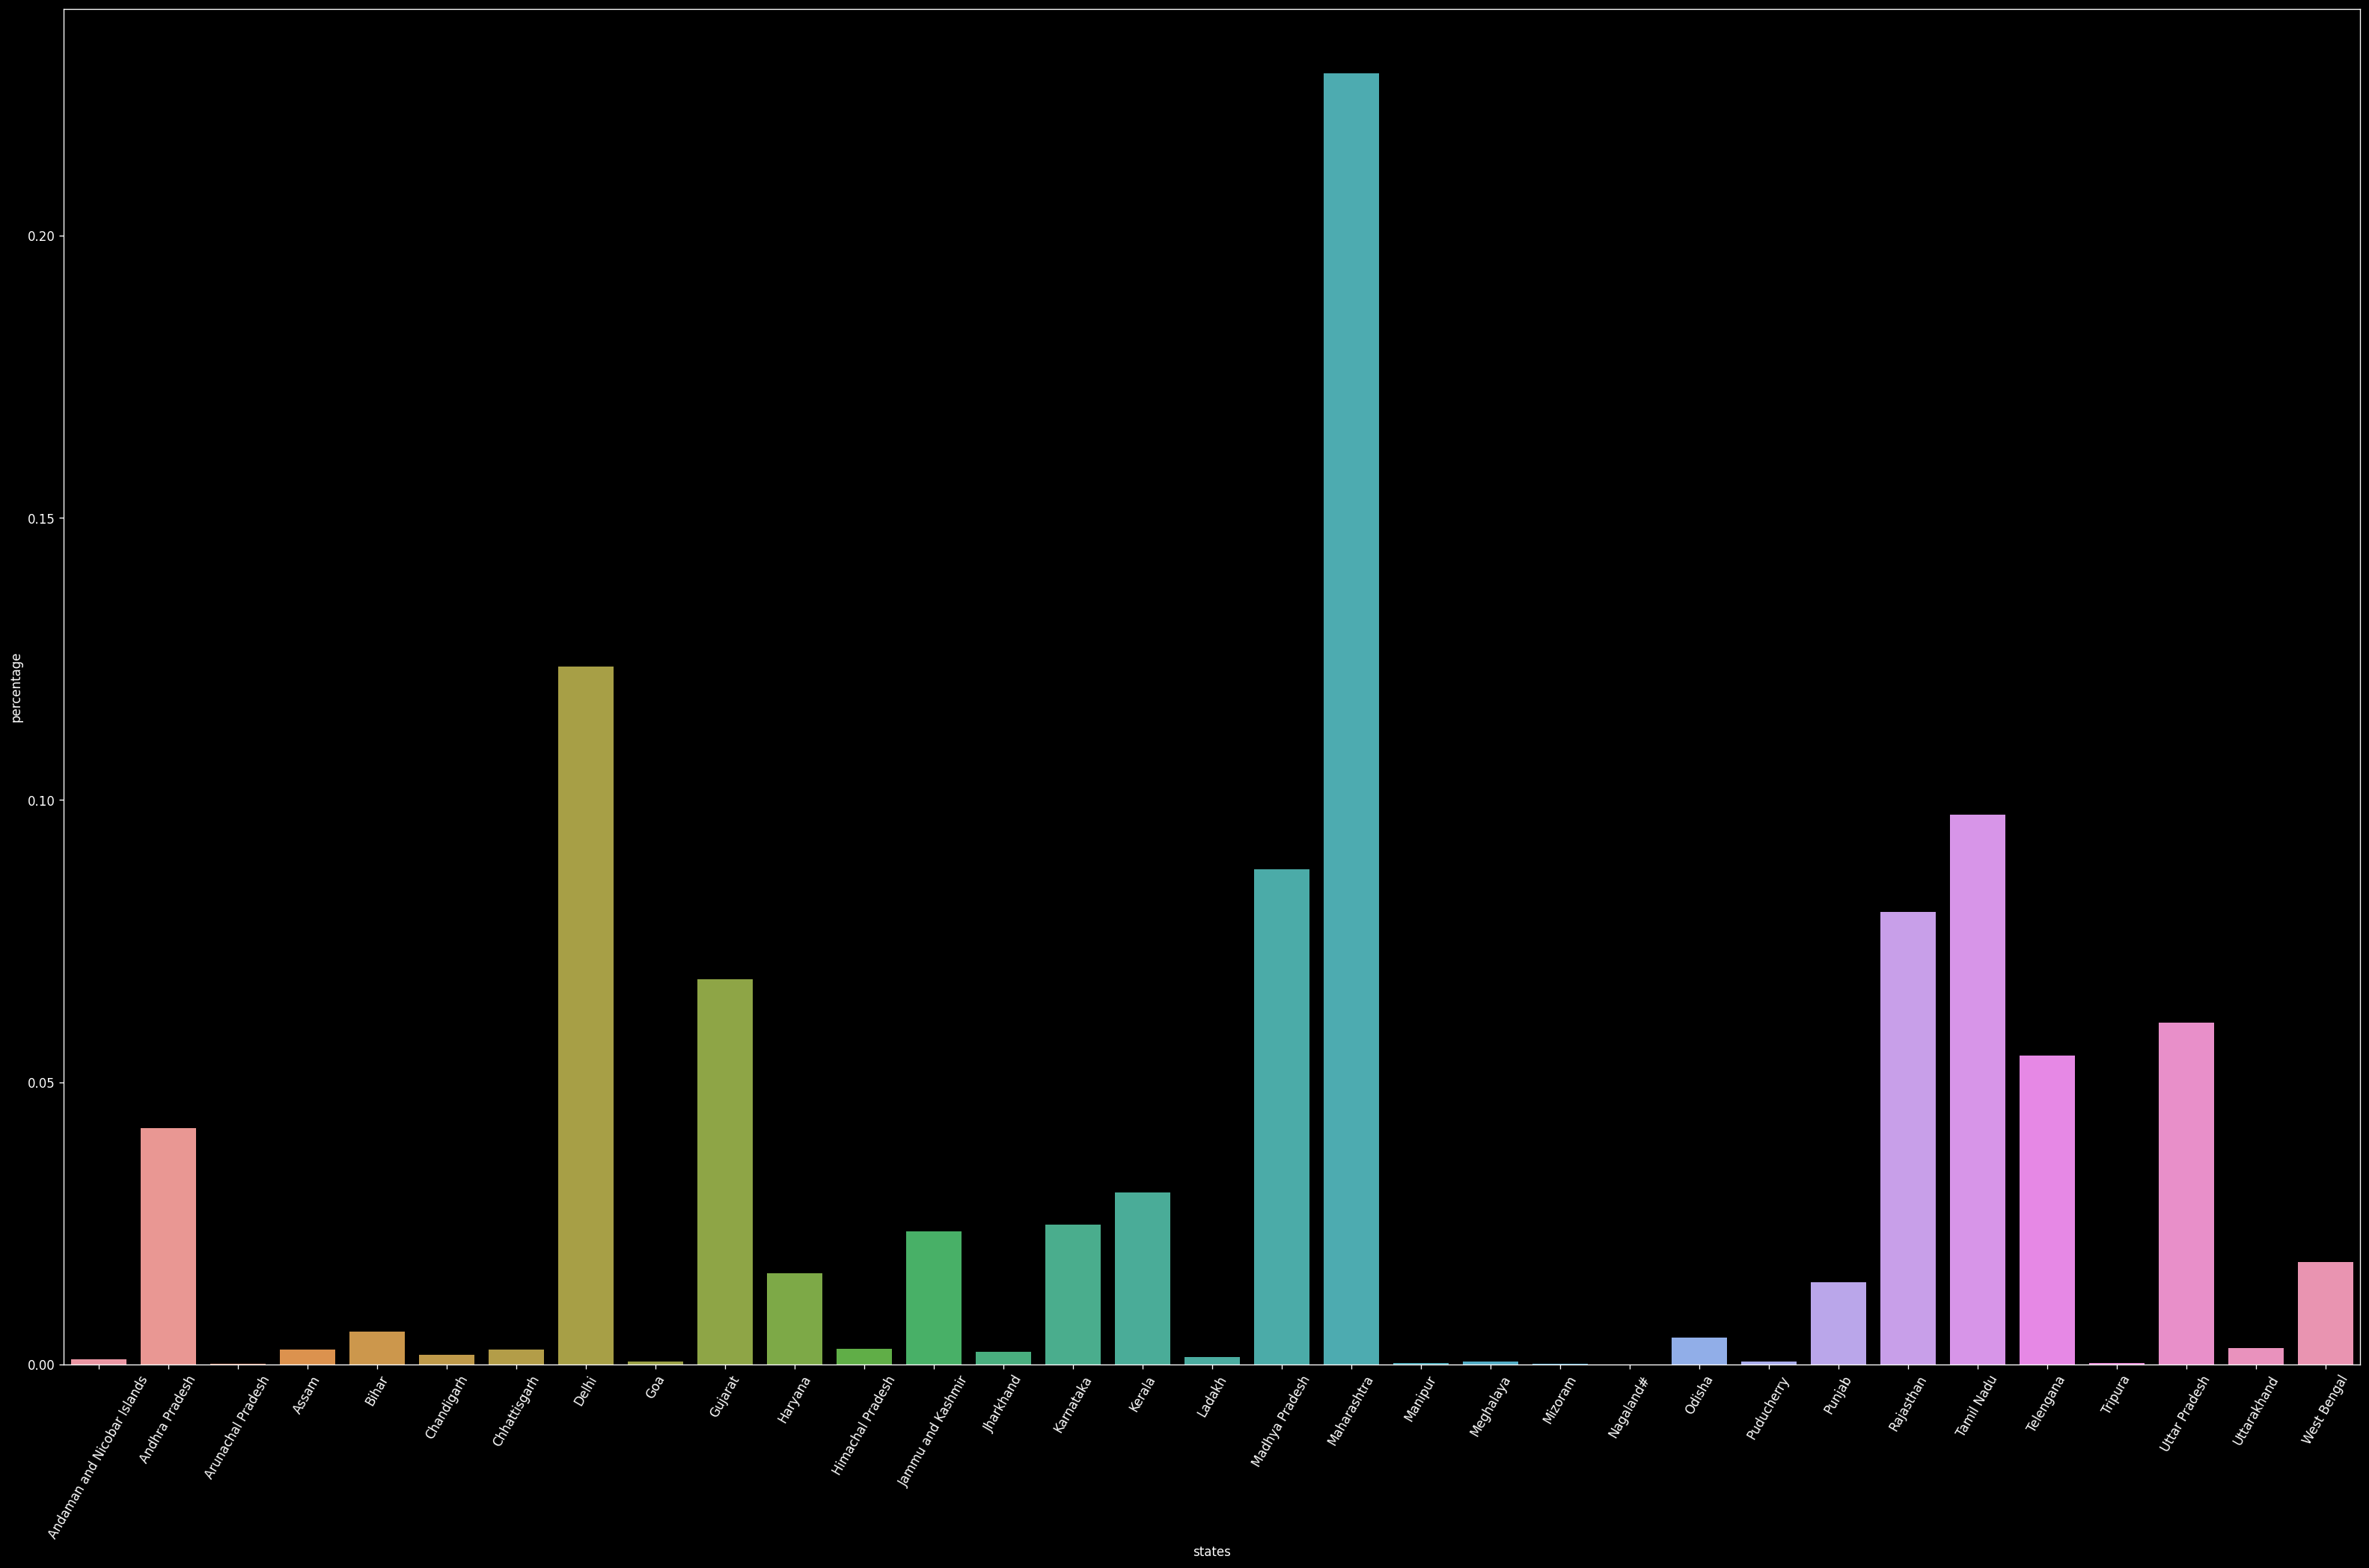

In [33]:
plt.figure(figsize=(33,20),dpi=120)
sns.barplot(x='states',y='percentage',data=percentage)
plt.xticks(rotation=60)

plt.show()

In [34]:
TotalDeathCases = state_wise_covidcases.Deaths.sum()

In [35]:
TotalCuredCases = state_wise_covidcases.Cured.sum()

In [36]:
percentage =pd.DataFrame({
    'states':state_wise_covidcases.index ,
    'percentage_confirms_cases':state_wise_covidcases.Confirmed / TotalConfirmedCases,
    'percentage_death_cases': state_wise_covidcases.Deaths / TotalDeathCases ,
    'percentage_cured_cases':state_wise_covidcases.Cured / TotalCuredCases
})

In [37]:
percentage.describe()

,percentage_confirms_cases,percentage_death_cases,percentage_cured_cases
count,33.000000,33.000000,33.000000
mean,0.030303,0.030303,0.030303
std,0.049053,0.079944,0.044335
min,0.000000,0.000000,0.000000
25%,0.000862,0.000000,0.003300
50%,0.004703,0.002381,0.011881
75%,0.041853,0.030952,0.042244
max,0.228780,0.445238,0.194719


In [38]:
newdata = percentage[percentage['percentage_confirms_cases']>percentage['percentage_confirms_cases'].quantile(0.50)]

In [39]:
newdata.shape

(16, 4)

In [40]:
newdata

,states,percentage_confirms_cases,percentage_death_cases,percentage_cured_cases
State/UnionTerritory,,,,
Andhra Pradesh,Andhra Pradesh,0.041853,0.033333,0.013201
Bihar,Bihar,0.005800,0.002381,0.019142
Delhi,Delhi,0.123677,0.076190,0.027723
Gujarat,Gujarat,0.068266,0.085714,0.042244
Haryana,Haryana,0.016067,0.007143,0.028383
Jammu and Kashmir,Jammu and Kashmir,0.023513,0.009524,0.023762
Karnataka,Karnataka,0.024688,0.030952,0.054125
Kerala,Kerala,0.030410,0.007143,0.143894
Madhya Pradesh,Madhya Pradesh,0.087781,0.126190,0.042244


In [41]:
list(enumerate(newdata.index))

[(0, 'Andhra Pradesh'),
 (1, 'Bihar'),
 (2, 'Delhi'),
 (3, 'Gujarat'),
 (4, 'Haryana'),
 (5, 'Jammu and Kashmir'),
 (6, 'Karnataka'),
 (7, 'Kerala'),
 (8, 'Madhya Pradesh'),
 (9, 'Maharashtra'),
 (10, 'Punjab'),
 (11, 'Rajasthan'),
 (12, 'Tamil Nadu'),
 (13, 'Telengana'),
 (14, 'Uttar Pradesh'),
 (15, 'West Bengal')]

In [42]:
#plt.figure(figsize=(7,7),dpi=120)
#for i in enumerate(newdata.index):
#   plt.subplot(8,2,i[0]+1)
    

In [43]:
data1 = newdata['percentage_confirms_cases']
data2 = newdata['percentage_death_cases']
data3 = newdata['percentage_cured_cases']
cols = newdata.index

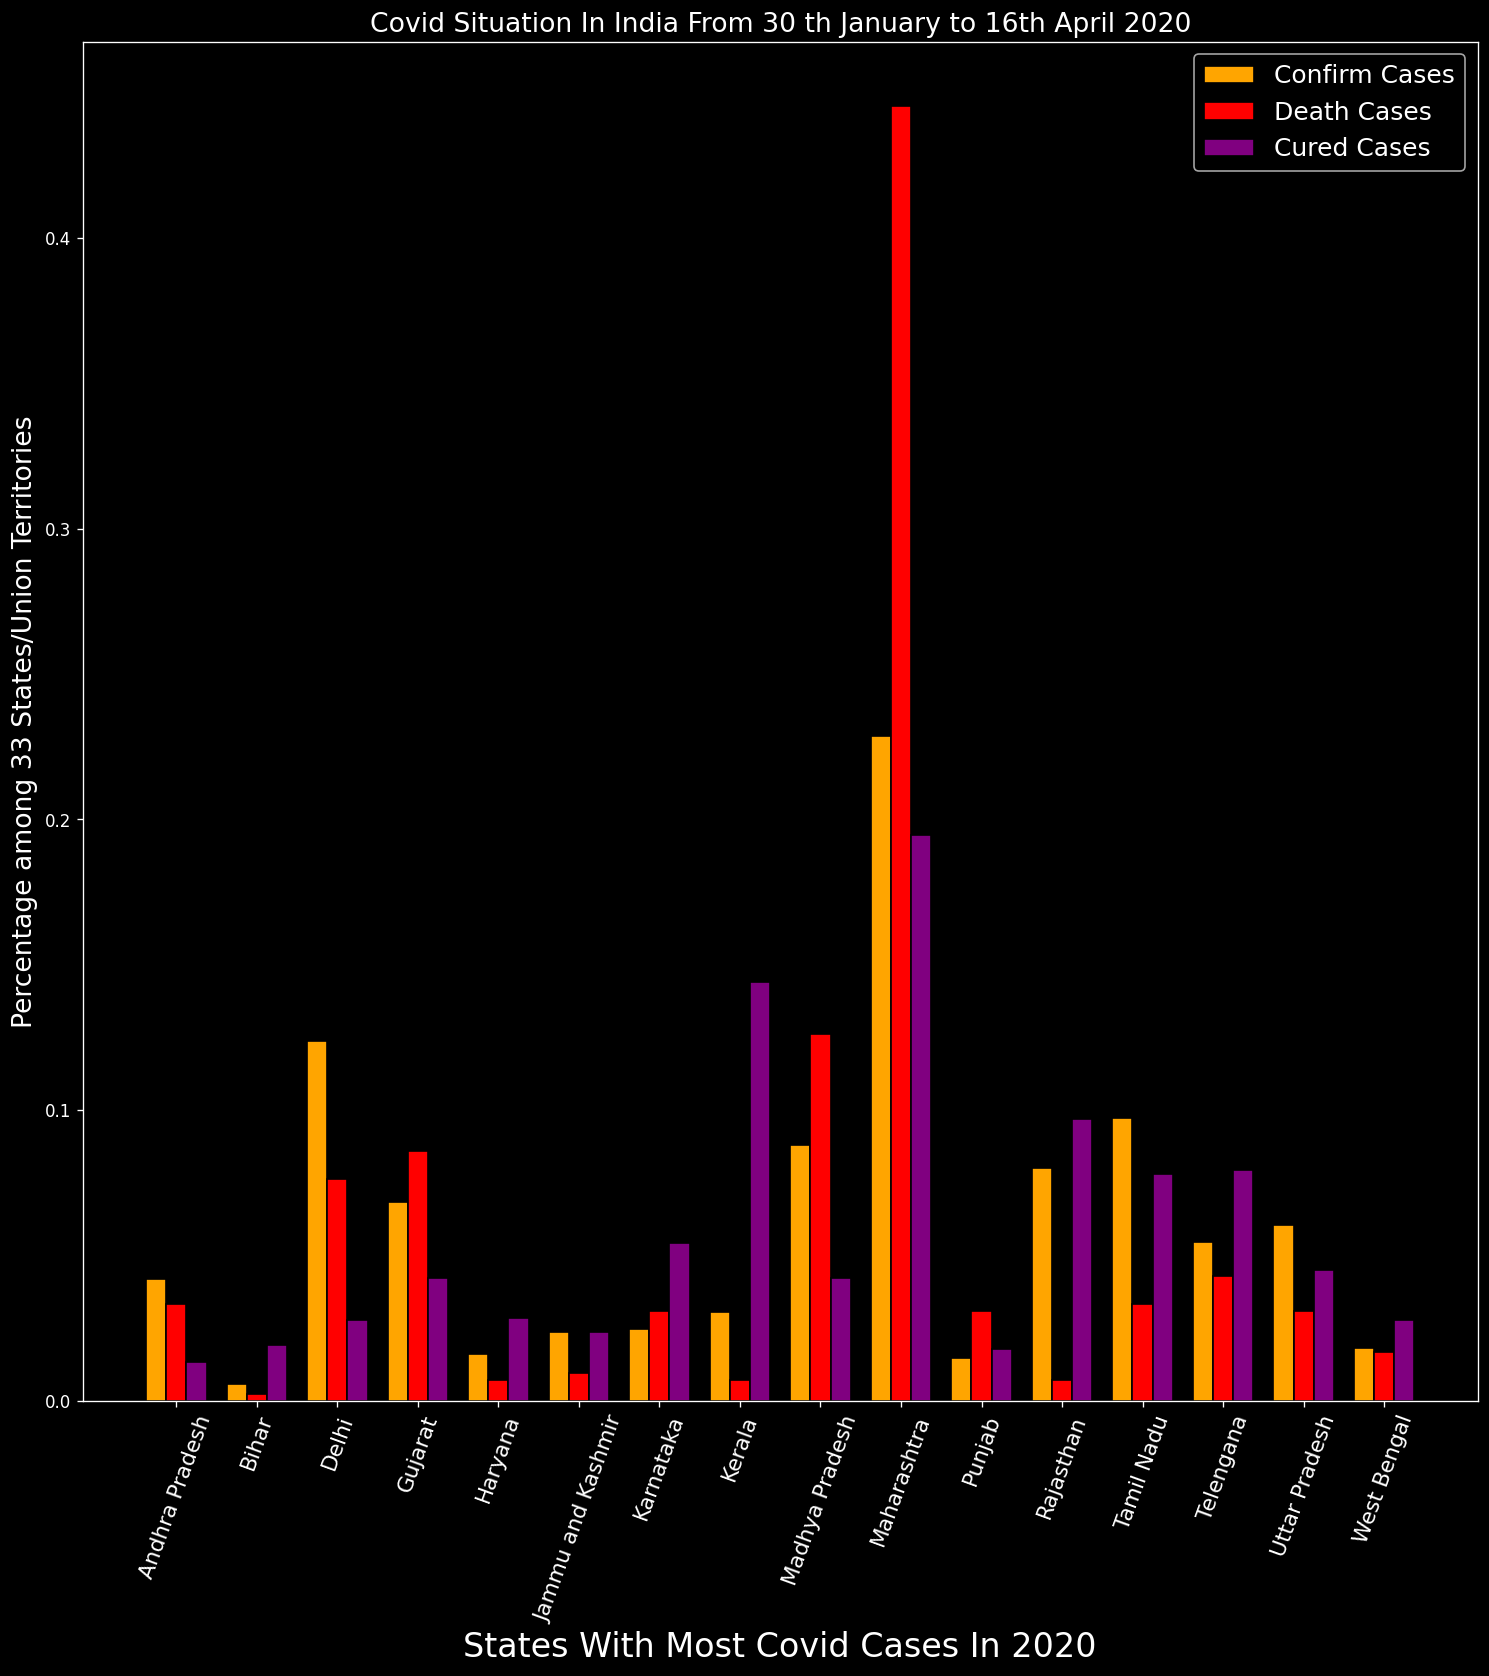

In [45]:
plt.figure(figsize=(15,15),dpi=120)
n=16
r = np.arange(n)
width = 0.25

plt.bar(r,newdata['percentage_confirms_cases'],color='orange', edgecolor = 'black',width = width,label='Confirm Cases')
plt.bar(r+width,newdata['percentage_death_cases'],color='red', edgecolor = 'black',width = width,label='Death Cases')
plt.bar(r+2*width,newdata['percentage_cured_cases'],color='purple', edgecolor = 'black',width = width,label='Cured Cases')

plt.xlabel("States With Most Covid Cases In 2020",fontsize=20)
plt.ylabel("Percentage among 33 States/Union Territories",fontsize=16)
plt.title("Covid Situation In India From 30 th January to 16th April 2020",fontsize=16)
plt.legend(fontsize=15)

plt.xticks(r + width,cols,rotation=70,fontsize=13)
plt.show()

In [43]:
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


Text(2, 3, 'COVID-19 Deaths Vs Cases')

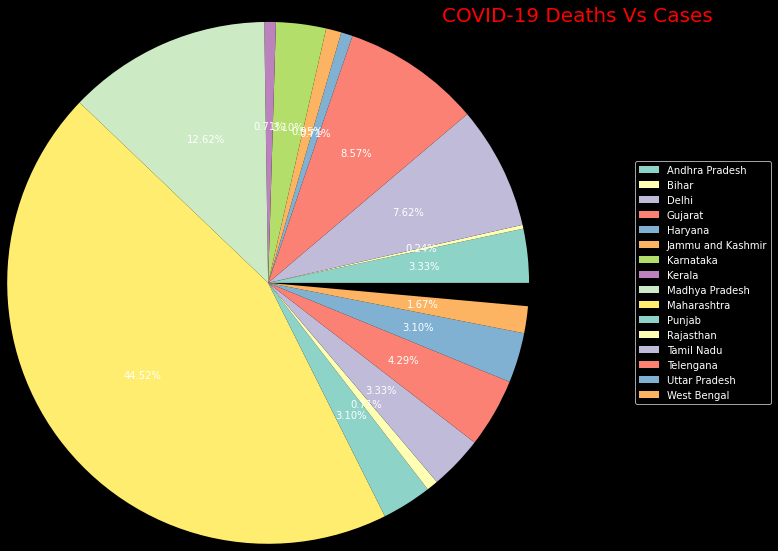

In [63]:
states = newdata['states']
deaths = newdata['percentage_death_cases']
plt.pie(deaths,radius=3,autopct='%1.2f%%')
plt.legend(states, loc='center',bbox_to_anchor=(2.5, 0.5))
plt.text(2,3,"COVID-19 Deaths Vs Cases",fontsize=20,color='red')

In [44]:
covid_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1020,1021,16/04/20,5:00 PM,Telengana,-,-,120,18,698
1021,1022,16/04/20,5:00 PM,Tripura,-,-,1,0,2
1022,1023,16/04/20,5:00 PM,Uttarakhand,-,-,9,0,37
1023,1024,16/04/20,5:00 PM,Uttar Pradesh,-,-,68,13,773


In [45]:
covid_time

NameError: name 'covid_time' is not defined

In [46]:
covid_data['Date'].unique()

array(['30/01/20', '31/01/20', '01/02/20', '02/02/20', '03/02/20',
       '04/02/20', '05/02/20', '06/02/20', '07/02/20', '08/02/20',
       '09/02/20', '10/02/20', '11/02/20', '12/02/20', '13/02/20',
       '14/02/20', '15/02/20', '16/02/20', '17/02/20', '18/02/20',
       '19/02/20', '20/02/20', '21/02/20', '22/02/20', '23/02/20',
       '24/02/20', '25/02/20', '26/02/20', '27/02/20', '28/02/20',
       '29/02/20', '01/03/20', '02/03/20', '03/03/20', '04/03/20',
       '05/03/20', '06/03/20', '07/03/20', '08/03/20', '09/03/20',
       '10/03/20', '11/03/20', '12/03/20', '13/03/20', '14/03/20',
       '15/03/20', '16/03/20', '17/03/20', '18/03/20', '19/03/20',
       '20/03/20', '21/03/20', '22/03/20', '23/03/20', '24/03/20',
       '25/03/20', '26/03/20', '27/03/20', '28/03/20', '29/03/20',
       '30/03/20', '31/03/20', '01/04/20', '02/04/20', '03/04/20',
       '04/04/20', '05/04/20', '06/04/20', '07/04/20', '08/04/20',
       '09/04/20', '10/04/20', '11/04/20', '12/04/20', '13/04/

In [48]:
covid_data.groupby(['Date'])['ConfirmedIndianNational','Cured','Deaths','Confirmed'].sum()

,Cured,Deaths,Confirmed
Date,,,
01/02/20,0,0,2
01/03/20,0,0,3
01/04/20,144,41,1834
02/02/20,0,0,3
02/03/20,0,0,5
...,...,...,...
29/03/20,96,27,1024
30/01/20,0,0,1
30/03/20,102,31,1251


In [53]:
newdata = covid_data[covid_data['ConfirmedForeignNational']!='-']

In [55]:
newdata.tail(30)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
416,417,27/03/20,10:00 AM,Uttarakhand,4,1,0,0,5
417,418,27/03/20,10:00 AM,Uttar Pradesh,40,1,11,0,41
418,419,27/03/20,10:00 AM,West Bengal,10,0,0,1,10
419,420,28/03/20,6:00 PM,Andhra Pradesh,14,0,1,0,14
420,421,28/03/20,6:00 PM,Andaman and Nicobar Islands,6,0,0,0,6
421,422,28/03/20,6:00 PM,Bihar,9,0,0,1,9
422,423,28/03/20,6:00 PM,Chandigarh,8,0,0,0,8
423,424,28/03/20,6:00 PM,Chhattisgarh,6,0,0,0,6
424,425,28/03/20,6:00 PM,Delhi,38,1,6,1,39
425,426,28/03/20,6:00 PM,Goa,3,0,0,0,3


In [59]:
newdata['ConfirmedIndianNational']=newdata['ConfirmedIndianNational'].map(pd.to_numeric)
newdata['ConfirmedForeignNational']= newdata['ConfirmedForeignNational'].map(pd.to_numeric)

In [61]:
newdata.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational      int64
ConfirmedForeignNational     int64
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [62]:
newdata.shape

(446, 9)

In [64]:
len(newdata['Date'].unique())

59

In [72]:
datewise = newdata.groupby(['Date'])['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths','Confirmed'].sum().reset_index()

In [76]:
datewise.shape

(59, 6)

In [80]:
import datetime
datewise['Date'] = pd.to_datetime(datewise['Date'], format='%d/%m/%y')

In [81]:
datewise = datewise.sort_values(by='Date')

In [83]:
datewise.reset_index()

,index,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,57,2020-01-30,1,0,0,0,1
1,58,2020-01-31,1,0,0,0,1
2,0,2020-02-01,2,0,0,0,2
3,2,2020-02-02,3,0,0,0,3
4,4,2020-02-03,3,0,0,0,3
5,6,2020-02-04,3,0,0,0,3
6,8,2020-02-05,3,0,0,0,3
7,10,2020-02-06,3,0,0,0,3
8,12,2020-02-07,3,0,0,0,3
9,14,2020-02-08,3,0,0,0,3


In [85]:
datewise.columns

Index(['Date', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

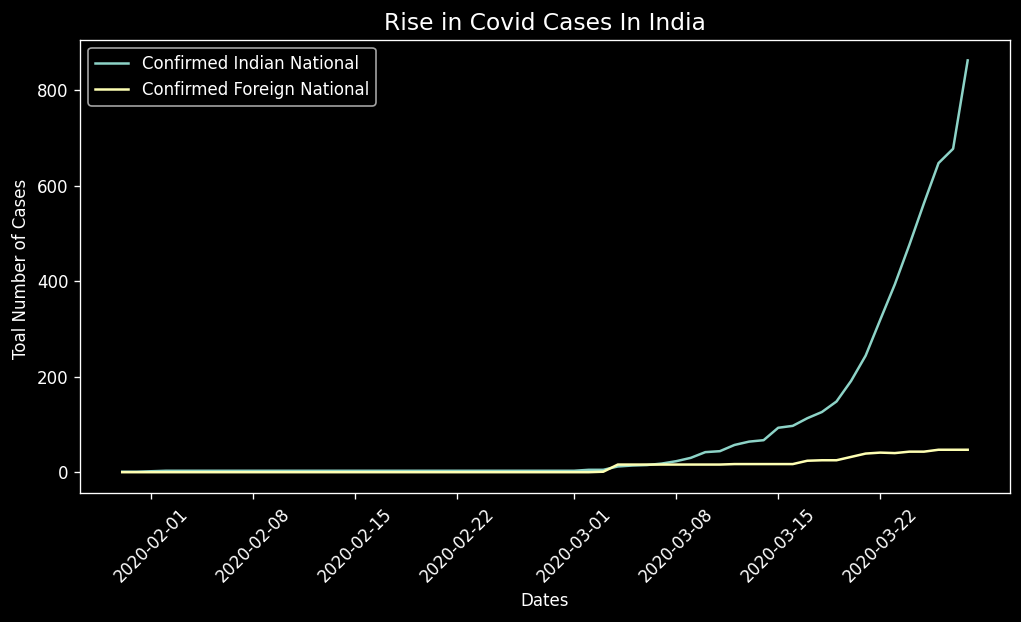

In [99]:
plt.figure(figsize=(10,5),dpi=120)
plt.plot(datewise.Date,datewise.ConfirmedIndianNational,label='Confirmed Indian National')
plt.plot(datewise.Date,datewise.ConfirmedForeignNational,label='Confirmed Foreign National')
plt.ylabel('Toal Number of Cases ')
plt.xlabel('Dates')
plt.title('Rise in Covid Cases In India',fontsize=14)
plt.xticks(rotation=45)
plt.legend()

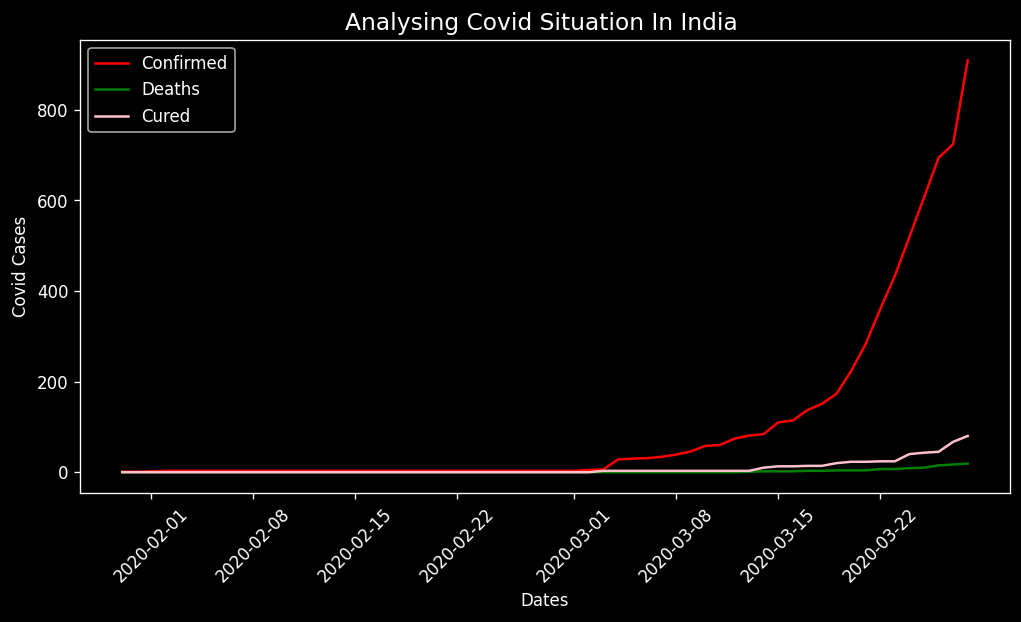

In [101]:
plt.figure(figsize=(10,5),dpi=120)
plt.plot(datewise.Date,datewise.Confirmed,label='Confirmed',color='red')
plt.plot(datewise.Date,datewise.Deaths,label='Deaths',color='green')
plt.plot(datewise.Date,datewise.Cured,label='Cured',color='pink')
plt.ylabel('Covid Cases')
plt.xlabel('Dates')
plt.title('Analysing Covid Situation In India ',fontsize=14)
plt.xticks(rotation=45)
plt.legend()